# Descriptive Statistics: Shape of a distribution (Kurtosis)

## Kurtosis

Kurtosis is a measure of the "tailedness" (how likely it is that extreme values on either side of the mean occur) of the probability distribution of a real-valued random variable.

On the left, we have a “platykurtic” data set (kurtosis = -.95), meaning that the data set is “too flat”. In the middle we have a “mesokurtic” data set (kurtosis is almost exactly 0), which means that the pointiness of the data is just about right. Finally, on the right, we have a “leptokurtic” data set (kurtosis = 2.12) indicating that the data set is “too pointy”. Note that kurtosis is measured with respect to a normal curve (black line).

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from scipy import stats

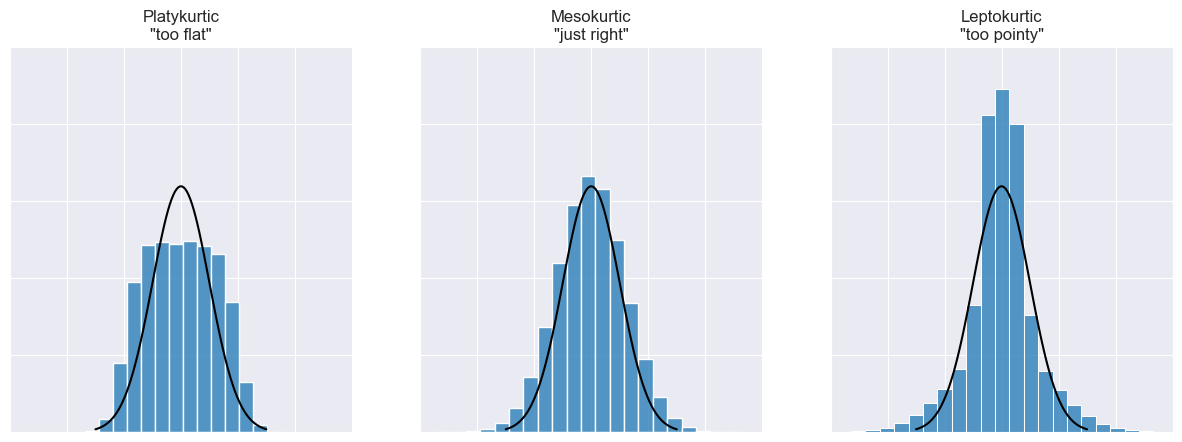

In [2]:
kurtosis_data = pd.read_csv("data/kurtosisdata.csv")

# define a normal distribution with a mean of 0 and a standard deviation of 1
mu = 0
sigma = 1
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)

platykurtic = kurtosis_data.loc[kurtosis_data["Kurtosis"] == "Platykurtic"]
mesokurtic = kurtosis_data.loc[kurtosis_data["Kurtosis"] == "Mesokurtic"]
leptokurtic = kurtosis_data.loc[kurtosis_data["Kurtosis"] == "Leptokurtic"]


fig, axes = plt.subplots(1, 3, figsize=(15, 5))

ax1 = sns.histplot(data=platykurtic, x = "Values", binwidth=.5, ax=axes[0])
ax2 = sns.histplot(data=mesokurtic, x = "Values", binwidth=.5,  ax=axes[1])
ax3 = sns.histplot(data=leptokurtic, x = "Values", binwidth=.5, ax=axes[2])


sns.lineplot(x=x,y=y*40000, ax=ax1, color='black')
sns.lineplot(x=x,y=y*40000, ax=ax2, color='black')
sns.lineplot(x=x,y=y*40000, ax=ax3, color='black')


axes[0].set_title("Platykurtic\n\"too flat\"")
axes[1].set_title("Mesokurtic\n\"just right\"")
axes[2].set_title("Leptokurtic\n\"too pointy\"")

for ax in axes:
    ax.set_xlim(-6,6)
    ax.set_ylim(0,25000)
    ax.set(xticklabels=[])
    ax.set(yticklabels=[])
    ax.set(xlabel=None)
    ax.set(ylabel=None)
    ax.tick_params(bottom=False)
    ax.tick_params(left=False)


sns.despine()

| informal term      | technical name | kurtosis value |
|:-------------------|:---------------|:---------------|
| too flat           | platykurtic    | negative       |
| just pointy enough | mesokurtic     | zero           |
| too pointy         | leptokurtic    | positive       |

#### Kurtosis formula

$$
\mbox{kurtosis}(X) = \frac{1}{N \hat\sigma^4} \sum_{i=1}^N \left( X_i - \bar{X} \right)^4  - 3
$$

The "$-3$" part is something that statisticians tack on to ensure that the normal curve has kurtosis zero: this is because the normal curve has a kurtosis of 3.

### Examples (kurtosis)

#### Example 1 (kurtosis)

In [3]:
incomes = np.random.normal(27000, 15000, 10000)
incomes = np.append(incomes, [1000000000])
df = pd.DataFrame(incomes)
df.kurtosis()

0    10000.954841
dtype: float64

#### Example 2 (kurtosis)

In [8]:
sp_data = pd.read_csv("data/SP_500_1987.csv", parse_dates=["Date"])
sp_data['Volume'] = sp_data['Volume'].str.replace(',', '').astype(int)
sp_data['Returns'] = sp_data['Close'].pct_change()
sp_data.dropna(inplace=True)

##### Calculate kurtosis using pandas

In [5]:
sp_data['Returns'].kurtosis(axis=0)

np.float64(43.302749862695954)

##### Calculate kurtosis using statsmodels

statsmodels will return:

- The standard kurtosis estimator.
- Kurtosis estimator based on octiles.
- Kurtosis estimators based on exceedence expectations.
- Kurtosis measure based on the spread between high and low quantiles.

In [9]:
sm.stats.stattools.robust_kurtosis(sp_data['Returns'])

(np.float64(42.42461267897301),
 np.float64(0.5260629102317422),
 np.float64(1.1767790081095497),
 np.float64(1.350873758059222))